# Import Necessary Libraries


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, levene, t


In [15]:
# Load the Excel file
file_path = './Data/Both in one sheet.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

In [16]:
# Extract the relevant columns for each car model
mitsubishi_efficiency = data.iloc[1:, 4].astype(float).dropna().reset_index(drop=True)
bmw_efficiency = data.iloc[1:, 10].astype(float).dropna().reset_index(drop=True)

In [17]:
# Calculate distribution statistics for each car model
def calculate_statistics(series):
    stats = {
        'median': series.median(),
        'mean': series.mean(),
        'variance': series.var(),
        'range': series.max() - series.min()
    }
    return stats

mitsubishi_stats = calculate_statistics(mitsubishi_efficiency)
bmw_stats = calculate_statistics(bmw_efficiency)


# Table with Descriptive Statistics

In [18]:
# Create a DataFrame to display the statistics
stats_df = pd.DataFrame([mitsubishi_stats, bmw_stats], index=['Mitsubishi Outlander', 'BMW IX xDrive50'])
print("Distribution Statistics:")
print(stats_df)

Distribution Statistics:
                        median      mean  variance     range
Mitsubishi Outlander  0.014398  0.011306  0.000026  0.013489
BMW IX xDrive50       0.028644  0.027052  0.000043  0.028678


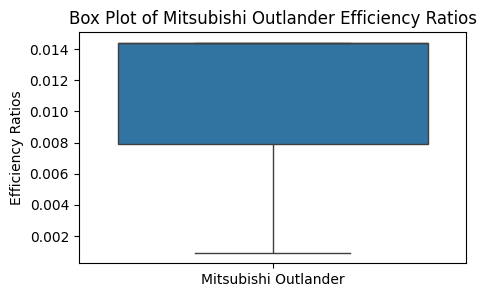

In [19]:
# Separate Box Plot for Mitsubishi Outlander
plt.figure(figsize=(5, 3))
sns.boxplot(data=mitsubishi_efficiency, notch=False)
plt.xticks([0], ['Mitsubishi Outlander'])
plt.ylabel('Efficiency Ratios')
plt.title('Box Plot of Mitsubishi Outlander Efficiency Ratios')
plt.show()

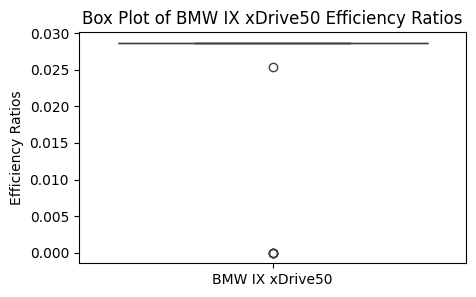

In [20]:
# Separate Box Plot for BMW IX xDrive50
plt.figure(figsize=(5, 3))
sns.boxplot(data=bmw_efficiency, notch=False)
plt.xticks([0], ['BMW IX xDrive50'])
plt.ylabel('Efficiency Ratios')
plt.title('Box Plot of BMW IX xDrive50 Efficiency Ratios')
plt.show()

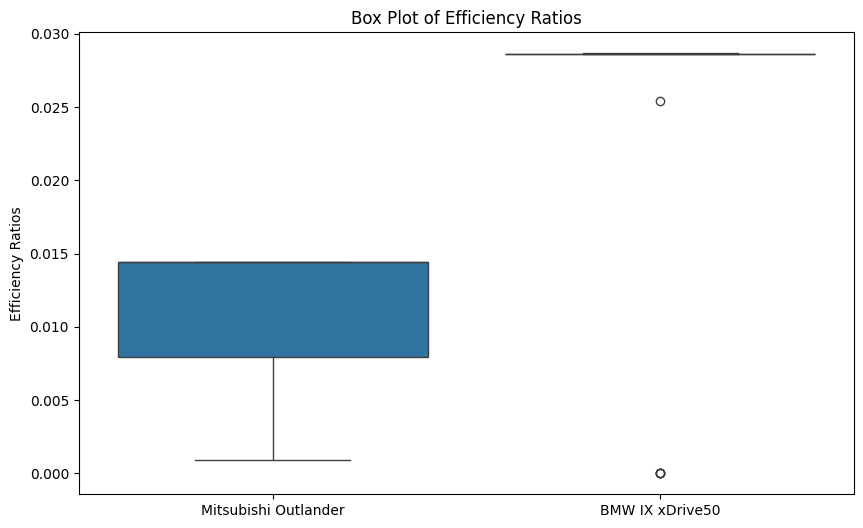

In [21]:
# Plot the data distribution using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[mitsubishi_efficiency, bmw_efficiency], notch=False)
plt.xticks([0, 1], ['Mitsubishi Outlander', 'BMW IX xDrive50'])
plt.ylabel('Efficiency Ratios')
plt.title('Box Plot of Efficiency Ratios')
plt.show()

In [22]:
# Check for normality using the Shapiro-Wilk test
shapiro_mitsubishi = shapiro(mitsubishi_efficiency)
shapiro_bmw = shapiro(bmw_efficiency)

In [23]:
# Check for equal variances using Levene's test
levene_test = levene(mitsubishi_efficiency, bmw_efficiency)

In [24]:
# Perform the two-sample t-test
t_stat, p_value = ttest_ind(mitsubishi_efficiency, bmw_efficiency)

# Display the t-distribution with the test statistic
df = len(mitsubishi_efficiency) + len(bmw_efficiency) - 2
x = np.linspace(-4, 4, 100)
y = t.pdf(x, df)

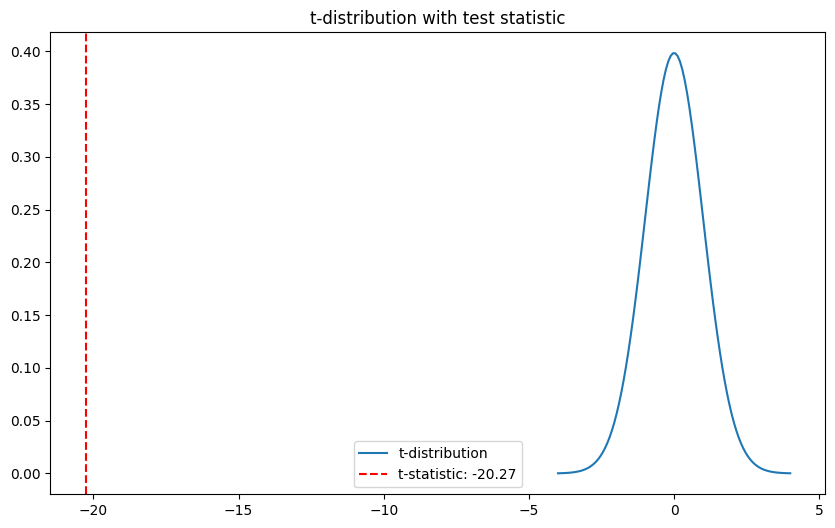

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution')
plt.axvline(t_stat, color='red', linestyle='--', label=f't-statistic: {t_stat:.2f}')
plt.title('t-distribution with test statistic')
plt.legend()
plt.show()

In [26]:
# Display results

# If the p-value is greater than 0.05, the data is normally distributed.
print("Shapiro-Wilk Test for Normality:")
print(f"Mitsubishi: Statistics={shapiro_mitsubishi[0]:.3f}, p-value={shapiro_mitsubishi[1]:.3f}")
print(f"BMW iXDrive 50: Statistics={shapiro_bmw[0]:.3f}, p-value={shapiro_bmw[1]:.3f}")

# If the p-value is greater than 0.05, the variances are equal.
print("\nLevene's Test for Equal Variances:")
print(f"Statistics={levene_test[0]:.3f}, p-value={levene_test[1]:.3f}")

print("\nTwo-Sample t-Test:")
print(f"t-statistic={t_stat:.3f}, p-value={p_value:.3e}")


Shapiro-Wilk Test for Normality:
Mitsubishi: Statistics=0.621, p-value=0.000
BMW iXDrive 50: Statistics=0.250, p-value=0.000

Levene's Test for Equal Variances:
Statistics=3.696, p-value=0.056

Two-Sample t-Test:
t-statistic=-20.265, p-value=9.834e-54


In [27]:
# Interpretation of the results
if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in Efficiency Ratios between the Mitsubishi and BMW iXDrive 50.")
else:
    print("Conclusion: There is no statistically significant difference in Efficiency Ratios between the Mitsubishi and BMW iXDrive 50.")

Conclusion: There is a statistically significant difference in Efficiency Ratios between the Mitsubishi and BMW iXDrive 50.
